In [1]:
import numpy as np
from matplotlib import pyplot as plt


In [2]:
caloBins = {'ECAL' : [], 'HCAL' : []}
with open('./TT.log','r') as f:
    lines = f.readlines()

for i,l in enumerate(lines):
    l = l.strip()
    if not l: continue
    if l[:3] == 'TT ':
        ttStr,layerStr = l.split(',')
        calType = layerStr.split(':')[1].strip()
        eta = lines[i+1].split('Eta Interval:')[1].split(',')
        etaEdges = [eval(x) for x in eta]
        phi = lines[i+2].split('Phi Interval:')[1].split(',')
        phiEdges = [eval(x) for x in phi]
        caloBins[calType].append((etaEdges,phiEdges))


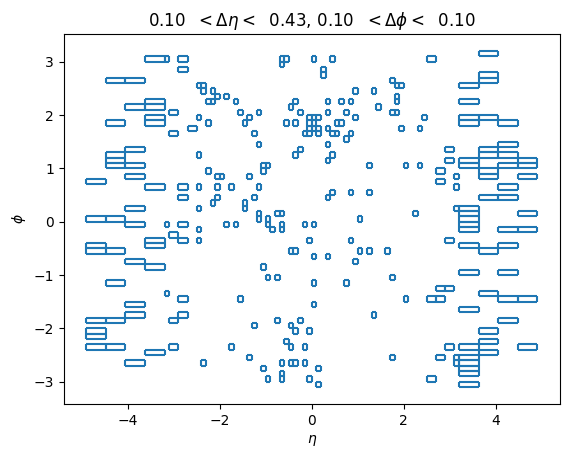

In [3]:
ecalBins = caloBins['ECAL']
detas = set([])
dphis = set([])
for etaPhi in ecalBins:
    eta_a,eta_b = etaPhi[0]
    phi_a,phi_b = etaPhi[1]
    detas.add(eta_b-eta_a)
    dphis.add(phi_b-phi_a)
    plt.vlines(x=[eta_a,eta_b],ymin=phi_a,ymax=phi_b)
    plt.hlines(y=[phi_a,phi_b],xmin=eta_a,xmax=eta_b)
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\phi$')
plt.title(r'%1.2f  $< \Delta \eta <$  %1.2f, %1.2f  $ < \Delta \phi <$  %1.2f' %(min(detas),max(detas),min(dphis),max(dphis)))
plt.show()

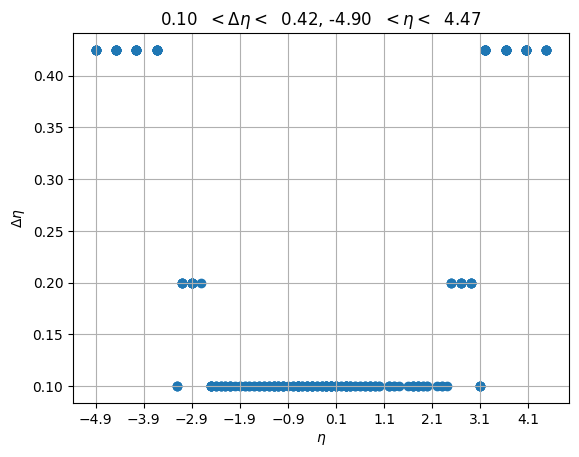

In [12]:
ecalBins = caloBins['ECAL']
detas = []
etas = []
etas_b = []
for etaPhi in ecalBins:
    eta_a,eta_b = etaPhi[0]    
    detas.append(np.round(eta_b-eta_a,4))
    etas.append(eta_a)
    etas_b.append(eta_b)
etas = np.array(etas)
detas = np.array(detas)
plt.xticks(np.arange(min(etas),max(etas),1.0))
plt.scatter(etas,detas)
plt.xlabel(r'$\eta$')
plt.ylabel(r'$\Delta \eta$')
plt.title(r'%1.2f  $< \Delta \eta <$  %1.2f, %1.2f  $ < \eta <$  %1.2f' %(min(detas),max(detas),min(etas),max(etas)))
# plt.xlim(-2.9,2.9)
plt.grid()
plt.show()

In [5]:
for deta in np.unique(detas):
    print('deta = ',deta)
    print(np.unique(etas[np.where(detas == deta)]))

deta =  0.1
[-3.2 -2.5 -2.4 -2.3 -2.2 -2.1 -2.  -1.9 -1.8 -1.7 -1.6 -1.5 -1.4 -1.3
 -1.2 -1.1 -1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1
  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.2  1.3  1.4  1.6  1.7
  1.8  1.9  2.   2.2  2.3  2.4  3.1]
deta =  0.2
[-3.1 -2.9 -2.7  2.5  2.7  2.9]
deta =  0.425
[-4.9   -4.475 -4.05  -3.625  3.2    3.625  4.05   4.475]


In [6]:
print(np.unique(etas))
print(np.unique(etas_b))

[-4.9   -4.475 -4.05  -3.625 -3.2   -3.1   -2.9   -2.7   -2.5   -2.4
 -2.3   -2.2   -2.1   -2.    -1.9   -1.8   -1.7   -1.6   -1.5   -1.4
 -1.3   -1.2   -1.1   -1.    -0.9   -0.8   -0.7   -0.6   -0.5   -0.4
 -0.3   -0.2   -0.1    0.     0.1    0.2    0.3    0.4    0.5    0.6
  0.7    0.8    0.9    1.     1.2    1.3    1.4    1.6    1.7    1.8
  1.9    2.     2.2    2.3    2.4    2.5    2.7    2.9    3.1    3.2
  3.625  4.05   4.475]
[-4.475 -4.05  -3.625 -3.2   -3.1   -2.9   -2.7   -2.5   -2.4   -2.3
 -2.2   -2.1   -2.    -1.9   -1.8   -1.7   -1.6   -1.5   -1.4   -1.3
 -1.2   -1.1   -1.    -0.9   -0.8   -0.7   -0.6   -0.5   -0.4   -0.3
 -0.2   -0.1    0.     0.1    0.2    0.3    0.4    0.5    0.6    0.7
  0.8    0.9    1.     1.1    1.3    1.4    1.5    1.7    1.8    1.9
  2.     2.1    2.3    2.4    2.5    2.7    2.9    3.1    3.2    3.625
  4.05   4.475  4.9  ]


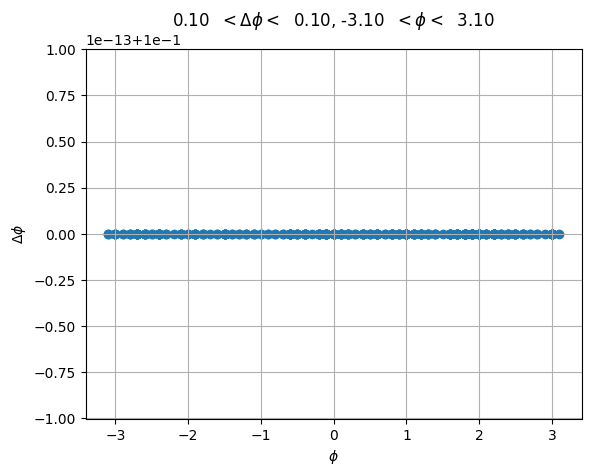

In [7]:
ecalBins = caloBins['ECAL']
dphis = []
phis = []
for etaPhi in ecalBins:
    phi_a,phi_b = etaPhi[1]
    dphis.append(phi_b-phi_a)
    phis.append(phi_a)
plt.scatter(phis,dphis)
plt.xlabel(r'$\phi$')
plt.ylabel(r'$\Delta \phi$')
plt.title(r'%1.2f  $< \Delta \phi <$  %1.2f, %1.2f  $ < \phi <$  %1.2f' %(min(dphis),max(dphis),min(phis),max(phis)))
plt.grid()
plt.show()

In [8]:
np.unique(phis)

array([-3.1, -3. , -2.9, -2.8, -2.7, -2.6, -2.5, -2.4, -2.3, -2.2, -2.1,
       -2. , -1.9, -1.8, -1.7, -1.6, -1.5, -1.4, -1.3, -1.2, -1.1, -1. ,
       -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,
        0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,
        1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,
        2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1])